In [1]:
import autograd.numpy as np
#import numpy as np 
import pymanopt
from pymanopt.manifolds import Stiefel
from pymanopt import manifolds
from pymanopt.optimizers import ConjugateGradient, SteepestDescent
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
%%time
k,n = 3, 128
A_ = np.random.randn(n,n)
A = A_ + A_.T
N = np.diag(np.arange(k, 0, -1))

CPU times: user 1.29 ms, sys: 359 µs, total: 1.65 ms
Wall time: 855 µs


In [3]:
manifold = Stiefel(n, k)

@pymanopt.function.autograd(manifold)
def cost(U):
    return np.trace(U.T@A@U@N)

problem = pymanopt.Problem(manifold, cost)

In [4]:
optimizers = []
optimizers.append(pymanopt.optimizers.SteepestDescent(verbosity=1, log_verbosity=2))
optimizers.append(pymanopt.optimizers.ConjugateGradient(verbosity=1, log_verbosity=2))

In [5]:
results = []
for optimizer in optimizers:
    res = optimizer.run(problem)
    results.append(res)

Optimizing...
Terminated - max iterations reached after 0.75 seconds.

Optimizing...
Terminated - min step_size reached after 237 iterations, 0.24 seconds.



In [6]:
results[0].log.keys()

dict_keys(['optimizer', 'stopping_criteria', 'optimizer_parameters', 'iterations'])

In [7]:
results[0].log['iterations'].keys()

dict_keys(['time', 'iteration', 'point', 'cost', 'gradient_norm'])

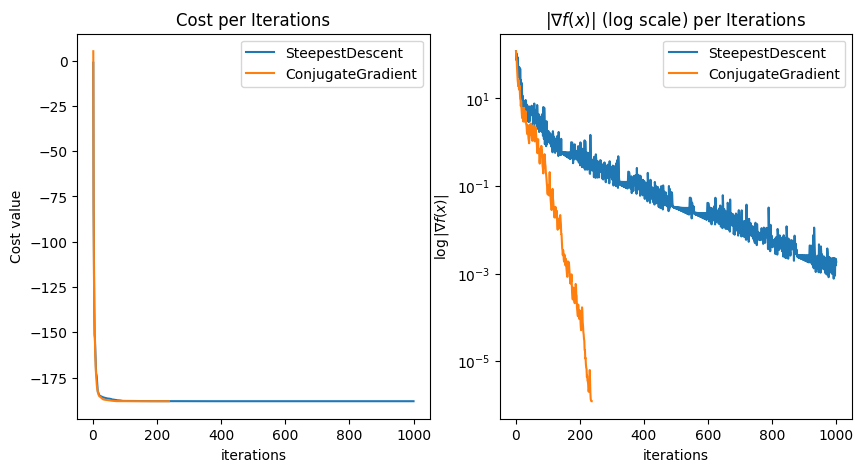

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Cost per Iterations')
ax2.set_title(r'$\| \nabla f(x)\|$ (log scale) per Iterations')
for res in results:
    opt_name = res.log['optimizer']
    iters = res.log['iterations']['iteration']
    cost = res.log['iterations']['cost']
    gnorm = res.log['iterations']['gradient_norm']
    ax1.plot(iters, cost, label=opt_name)
    ax2.plot(iters, gnorm, label=opt_name)
    
    ax1.set_xlabel('iterations')
    ax2.set_xlabel('iterations')
    ax1.set_ylabel('Cost value')
    ax2.set_ylabel(r'$\log \|\nabla f(x)\|$')
    
    ax2.set_yscale('log')    
ax1.legend()    
ax2.legend()

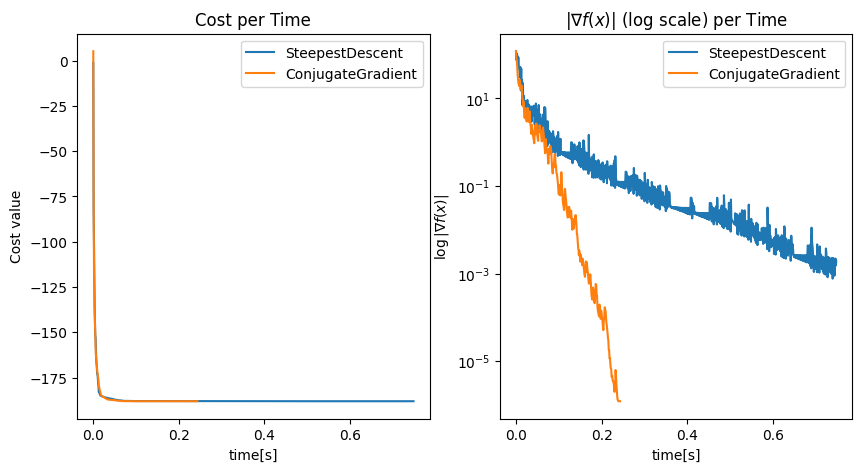

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Cost per Time')
ax2.set_title(r'$\| \nabla f(x)\|$ (log scale) per Time')
for res in results:
    opt_name = res.log['optimizer']
    ts = np.array(res.log['iterations']['time'])
    ts = ts - ts[0]
    cost = res.log['iterations']['cost']
    gnorm = res.log['iterations']['gradient_norm']
    ax1.plot(ts, cost, label=opt_name)
    ax2.plot(ts, gnorm, label=opt_name)
    
    ax1.set_xlabel('time[s]')
    ax2.set_xlabel('time[s]')
    ax1.set_ylabel('Cost value')
    ax2.set_ylabel(r'$\log \|\nabla f(x)\|$')
    
    ax2.set_yscale('log')    
ax1.legend()    
ax2.legend()